# Hypothesis Testing

For this assignment, I will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

Use the hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [27]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats

In [28]:
! pip install pandas

In [29]:
data = 'Data/insurance - insurance.csv'
df = pd.read_csv(data)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1. Do smokers have higher insurance charges than non-smokers?

### State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis):There is no difference between insurance charges for smokers and non-smokers.
- $H_A$ (Alternative Hypothesis): There is a significant difference between insurance charges for snmokers and non-smokers.

- Select the correct test according to the data type and number of samples

    - Type of data: Numeric
    - How many groups/samples?: 2 Groups/samples
    - What is the appropriate test?: 2 sample T-Test

In [31]:
## check the col that contains the measurement: 'charges'
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [32]:
## check the col that contains info on 'smoker'
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [33]:
## create a column that easily separates our groups: 'smoker_yes'
df['smoker_yes'] = df['smoker'].str.contains('yes')
df['smoker_yes'].value_counts()

False    1064
True      274
Name: smoker_yes, dtype: int64

In [34]:
## save list of columns needed for each group
needed_cols = ['smoker_yes','charges']

df[needed_cols]

,smoker_yes,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [35]:
## save male team in separate variable
non_smoker_df = df.loc[ df['smoker_yes']== False, needed_cols]
non_smoker_df

,smoker_yes,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [36]:
## save male team in separate variable
smoker_df = df.loc[ df['smoker_yes']== True, needed_cols]
smoker_df

,smoker_yes,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [37]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([smoker_df,non_smoker_df])
plot_df

,smoker_yes,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


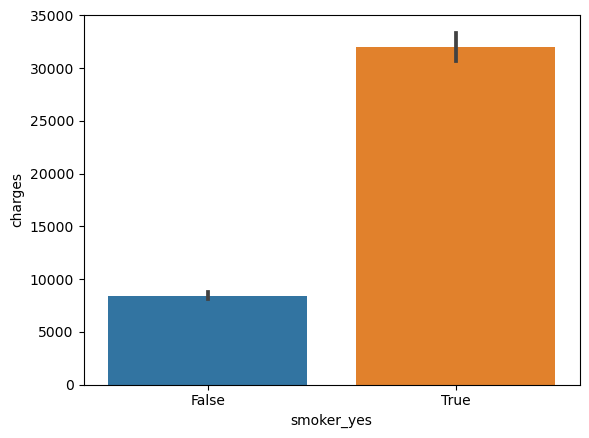

In [38]:
## visualize the group means
sns.barplot(data=plot_df, x='smoker_yes',y='charges')
plt.savefig('Data/smoker_charges.png')

![Smoker v/s Insurance Charges](Data/smoker_charges.png)

### Test the assumptions of your selected test.
- No significant outliers
- Normality
- Equal Variance


#### Assumption: No significant outliers

In [39]:
# Checking Assumption of No Significant Outliers
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
smoker_group


0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [40]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
print(f'There are {smoker_outliers.sum()} outlier in the smokers group.')

There are 0 outlier in the smokers group.


In [41]:
## Check non_smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3
print(f'There are {non_smoker_outliers.sum()} outlier in the non-smokers group.')

There are 24 outlier in the non-smokers group.


##### Removing outliers

In [42]:
## remove outliers from non_smoker_group
non_smoker_group = non_smoker_group.loc[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Assumption: Normally Distributed Groups

In [43]:
## Check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue


5.564930630036463e-14

In [44]:
## Check n for smoker group
len(smoker_group)

274

In [45]:
## Check non-smoker group for normality
result = stats.normaltest(non_smoker_group)
result.pvalue


2.6945416315543976e-36

In [46]:
## Check n for non-smoker group
len(non_smoker_group)

1040

- Did we meet the assumption of normality?
    - We have large enough groups that we can safely disregard the assumption of normality.



#### Assumption: Equal Variance

In [47]:
## use Levene's test to check if groups have equal variance
rseult = stats.levene(smoker_group, non_smoker_group)
print(result)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


In [48]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- Did we meet the assumption of equal variance?
    - We met the assumption of normality but did NOT meet the assumption of equal variance.
    - We will therefore run a Welch's t-test instead by adding equal_var=False to stats.ttest_ind



###  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [49]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)


True

In [50]:
smoker_group.mean()

32050.23183153284

In [51]:
non_smoker_group.mean()

7939.8608446721155

### Interpret your p-value and reject or fail to reject your null hypothesis 

- We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that smokers pay higher insurance charges.

### Show a supporting visualization that helps display the result

<Axes: xlabel='smoker', ylabel='charges'>

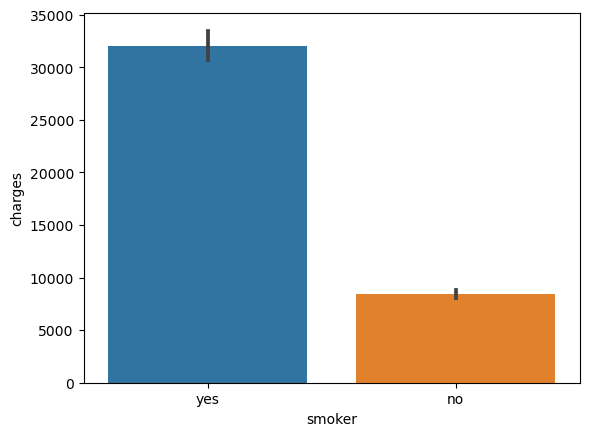

In [52]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='smoker',y='charges')

## 2. Are men more likely to smoke than women?

###  State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no differnce between gender and the likeliness to smoke.
- $H_A$ (Alternative Hypothesis): There is a significant difference between gender and the likeliness to smoke.

###  Select the correct test according to the data type and number of samples

- Type of data: Categorical
- How many groups/samples?: 2 Groups/samples
- What is the appropriate test?: Chi-Square

#### Visualize and separate data for hypothesis
- What column is our target?
    - smoker
- What column determines our groups?
    - sex

In [53]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [54]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

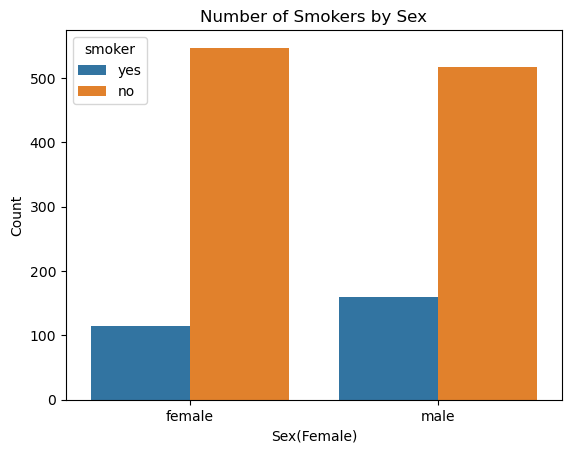

In [59]:
## visualize the group means
ax = sns.countplot(data=df, x='sex', hue='smoker')
ax.set_title('Number of Smokers by Sex')
ax.set_xlabel('Sex(Female)')
ax.set_ylabel('Count');

### Test the assumptions of your selected test.
- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

#### Assumption: the outcomes are independent

In [61]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [62]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [64]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Since our p < .05, we reject the null hypothesis that there is no differnce between gender and the likeliness to smoke.

## 3. Do different regions have different charges, on average?

In [68]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [72]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no difference based on regions and charges
- $H_A$ (Alternative Hypothesis): There is a significant difference based on region and charges

- Select the correct test according to the data type and number of samples

    - Type of data: Numeric
    - How many groups/samples?: 4 Groups/samples
    - What is the appropriate test?: ANOVA (each group has n>15)

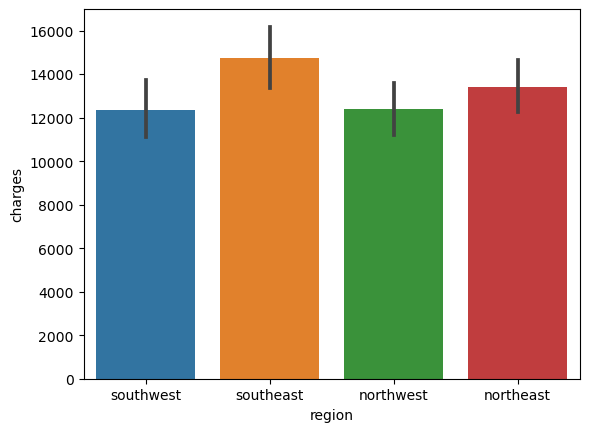

In [73]:
sns.barplot(data=df, x='region',y='charges');

In [81]:
## create a column that easily separates our groups: 'sw'
df['sw'] = df['region'].str.contains('southwest')
df['sw'].value_counts()

False    1013
True      325
Name: sw, dtype: int64

In [82]:
## create a column that easily separates our groups: 'se'
df['se'] = df['region'].str.contains('southeast')
df['se'].value_counts()

False    974
True     364
Name: se, dtype: int64

In [83]:
## create a column that easily separates our groups: 'nw'
df['nw'] = df['region'].str.contains('northwest')
df['nw'].value_counts()

False    1013
True      325
Name: nw, dtype: int64

In [84]:
## create a column that easily separates our groups: 'ne'
df['ne'] = df['region'].str.contains('northeast')
df['ne'].value_counts()

False    1014
True      324
Name: ne, dtype: int64

In [85]:
## save list of columns needed for each group
needed_cols = ['sw','se','nw','ne','charges']

df[needed_cols]

,sw,se,nw,ne,charges
0,True,False,False,False,16884.92400
1,False,True,False,False,1725.55230
2,False,True,False,False,4449.46200
3,False,False,True,False,21984.47061
4,False,False,True,False,3866.85520
...,...,...,...,...,...
1333,False,False,True,False,10600.54830
1334,False,False,False,True,2205.98080
1335,False,True,False,False,1629.83350
1336,True,False,False,False,2007.94500


In [87]:
## save sw in separate variable
sw_df = df.loc[ df['sw']== True, needed_cols]
sw_df

,sw,se,nw,ne,charges
0,True,False,False,False,16884.92400
12,True,False,False,False,1826.84300
15,True,False,False,False,1837.23700
18,True,False,False,False,10602.38500
19,True,False,False,False,36837.46700
...,...,...,...,...,...
1316,True,False,False,False,1731.67700
1329,True,False,False,False,10325.20600
1331,True,False,False,False,10795.93733
1332,True,False,False,False,11411.68500


In [88]:
## save se in separate variable
se_df = df.loc[ df['se']== True, needed_cols]
se_df

,sw,se,nw,ne,charges
1,False,True,False,False,1725.5523
2,False,True,False,False,4449.4620
5,False,True,False,False,3756.6216
6,False,True,False,False,8240.5896
11,False,True,False,False,27808.7251
...,...,...,...,...,...
1322,False,True,False,False,12981.3457
1323,False,True,False,False,43896.3763
1327,False,True,False,False,9377.9047
1330,False,True,False,False,12629.1656


In [89]:
## save nw in separate variable
nw_df = df.loc[ df['nw']== True, needed_cols]
nw_df

,sw,se,nw,ne,charges
3,False,False,True,False,21984.47061
4,False,False,True,False,3866.85520
7,False,False,True,False,7281.50560
9,False,False,True,False,28923.13692
24,False,False,True,False,6203.90175
...,...,...,...,...,...
1319,False,False,True,False,7201.70085
1320,False,False,True,False,5425.02335
1324,False,False,True,False,4239.89265
1333,False,False,True,False,10600.54830


In [90]:
## save ne in separate variable
ne_df = df.loc[ df['ne']== True, needed_cols]
ne_df

,sw,se,nw,ne,charges
8,False,False,False,True,6406.41070
10,False,False,False,True,2721.32080
16,False,False,False,True,10797.33620
17,False,False,False,True,2395.17155
20,False,False,False,True,13228.84695
...,...,...,...,...,...
1321,False,False,False,True,28101.33305
1325,False,False,False,True,13143.33665
1326,False,False,False,True,7050.02130
1328,False,False,False,True,22395.74424


### Test the assumptions of your selected test.
- No significant outliers
- Equal variance
- Normality

#### Assumption: No significant outliers

In [91]:
# Checking Assumption of No Significant Outliers
## Saving JUST the numeric col as final group variables
sw_group = sw_df['charges']
se_group = se_df['charges']
nw_group = nw_df['charges']
ne_group = ne_df['charges']
sw_group

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [92]:
## Check sw group for outliers
sw_outliers = np.abs(stats.zscore(sw_group)) > 3
print(f'There are {sw_outliers.sum()} outlier in the sw group.')

There are 8 outlier in the sw group.


In [94]:
## Check se group for outliers
se_outliers = np.abs(stats.zscore(se_group)) > 3
print(f'There are {se_outliers.sum()} outlier in the se group.')

There are 2 outlier in the se group.


In [95]:
## Check nw group for outliers
nw_outliers = np.abs(stats.zscore(nw_group)) > 3
print(f'There are {nw_outliers.sum()} outlier in the nw group.')

There are 7 outlier in the nw group.


In [96]:
## Check ne group for outliers
ne_outliers = np.abs(stats.zscore(ne_group)) > 3
print(f'There are {ne_outliers.sum()} outlier in the ne group.')

There are 4 outlier in the ne group.


##### Removing outliers

In [97]:
## remove outliers from sw_group
sw_group = sw_group.loc[~sw_outliers]
sw_group

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 317, dtype: float64

In [98]:
## remove outliers from other region groups
se_group = se_group.loc[~se_outliers]
nw_group = nw_group.loc[~nw_outliers]
ne_group = ne_group.loc[~ne_outliers]

#### Normality

In [102]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [100]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [76]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- The pvalues are less then 0.05, hence the Normality assumption is NOT met. 

#### Assumption: Equal Variance

In [77]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- The pvalue is less than 0.05, hence the Equal Variance Assumption is NOT met.

###  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [78]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result


F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [106]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"Reject Null Hypothesis.")
else:
    print(f"Fail to Reject Null Hypothesis.")

Reject Null Hypothesis.


In [103]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']


In [104]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


### Interpret your p-value and reject or fail to reject your null hypothesis 

- pvalue is less than 0.05 hence, I reject the null hypothesis.
- Also, we can see those in southeast region pay higher insurance charges, on average. 

### Show a supporting visualization that helps display the result

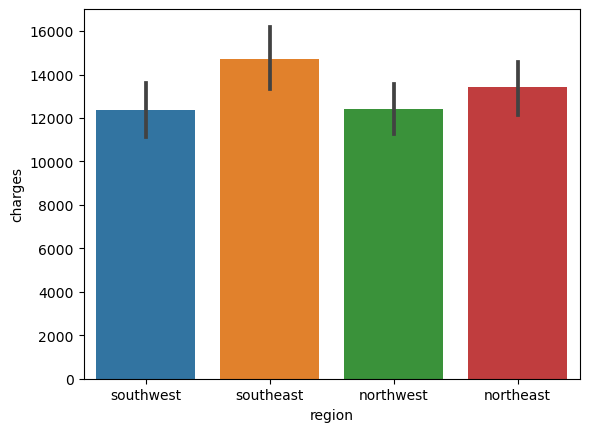

In [107]:
sns.barplot(data=df, x='region',y='charges');